In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import kruskal

In [2]:
df = pd.read_csv(r'C:\Users\Sahil\Omdena\Detecting and Mitigating Traffic Accidents\datasets\CrashData_cleaned_SK.csv')
df

,Accident_ID,street,Accident_SerialNo,Year,Month,Day,C,A,B,K,...,On_Peop,Crash,Pedes,Run_Off,DateOnly,HolidayType,TimeNew,TimeHr,lat,long
0,935394,K.A.S,046269م,2014,1,Friday,0,0.0,0,0,...,0,1,0,NaN,2014-01-03,No holiday,19:59:59.712000,19,32.001945,35.849682
1,1061774,K.A.S,A161838,2014,1,Wednesday,0,0.0,0,0,...,0,1,0,NaN,2014-01-01,National holiday,23:53:00.096000,23,31.957565,35.846437
2,1065134,K.A.S,A166712,2014,1,Monday,1,0.0,0,0,...,1,1,0,NaN,2014-01-27,No holiday,17:14:00.384000,17,31.994699,35.855531
3,907647,K.A.S,A17307,2014,1,Wednesday,0,0.0,0,0,...,0,1,0,NaN,2014-01-01,National holiday,15:20:00.096000,15,31.955189,35.833736
4,907697,K.A.S,A17363,2014,1,Saturday,0,0.0,0,0,...,0,1,0,NaN,2014-01-18,No holiday,18:15:59.904000,18,31.962443,35.856456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,1794370,K.A.S,A726335,2018,5,Tuesday,0,0.0,0,0,...,0,1,0,NaN,2018-05-01,National holiday,15:49:00.192000,15,31.996256,35.855272
65531,1794372,K.A.S,A726337,2018,5,Tuesday,0,0.0,0,0,...,0,1,0,NaN,2018-05-01,National holiday,15:53:00.384000,15,31.990072,35.808380
65532,1794373,K.A.S,A726338,2018,5,Tuesday,0,0.0,0,0,...,0,1,0,NaN,2018-05-01,National holiday,15:56:59.712000,15,31.981836,35.863754
65533,1794374,K.A.S,A726340,2018,5,Tuesday,0,0.0,0,0,...,0,1,0,NaN,2018-05-01,National holiday,16:00:59.904000,16,31.954732,35.855710


In [5]:
df['Run_Off'].value_counts()

1.0    210
Name: Run_Off, dtype: int64

In [7]:
df.columns

Index(['Accident_ID', 'street', 'Accident_SerialNo', 'Year', 'Month', 'Day',
       'C', 'A', 'B', 'K', 'O', 'On_Peop', 'Crash', 'Pedes', 'Run_Off',
       'DateOnly', 'HolidayType', 'TimeNew', 'TimeHr', 'lat', 'long'],
      dtype='object')

# Visualising the accidents as per year, month, day & holiday type

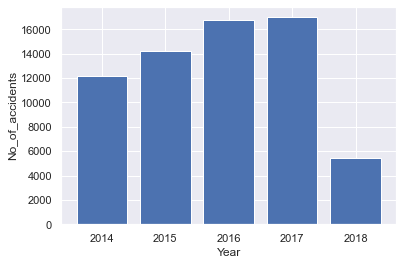

In [5]:
accidents = df['Year'].value_counts()
plt.bar(accidents.index, accidents.values)
plt.xlabel('Year')
plt.ylabel('No_of_accidents')
plt.show()

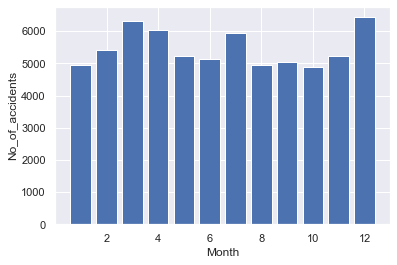

In [6]:
accidents = df['Month'].value_counts()
plt.bar(accidents.index, accidents.values)
plt.xlabel('Month')
plt.ylabel('No_of_accidents')
plt.show()

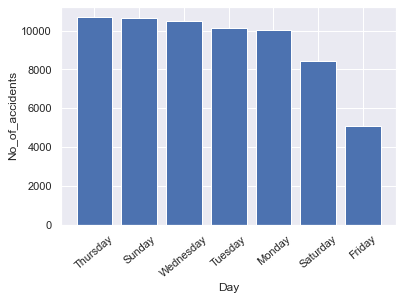

In [7]:
accidents = df['Day'].value_counts()
plt.bar(accidents.index, accidents.values)
plt.xlabel('Day')
plt.ylabel('No_of_accidents')
plt.xticks(rotation = 40)
plt.show()

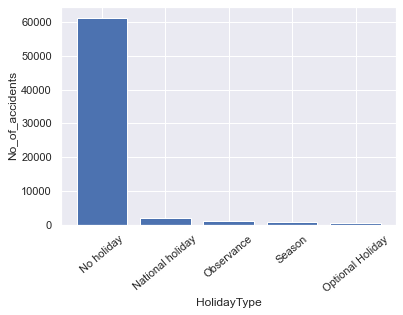

In [10]:
accidents = df['HolidayType'].value_counts()
plt.bar(accidents.index, accidents.values)
plt.xlabel('HolidayType')
plt.ylabel('No_of_accidents')
plt.xticks(rotation = 40)
plt.show()

In [3]:
def holidayRev(dataframe):
    holidays = []
    for i in range(len(dataframe)):
        if dataframe['HolidayType'][i] == 'No holiday':
            holidays.append('Non-Holiday')
        else:
            holidays.append('Holiday')
    return holidays

In [4]:
df['Holidays'] = holidayRev(df)
df.head()

,Accident_ID,street,Accident_SerialNo,Year,Month,Day,C,A,B,K,...,Crash,Pedes,Run_Off,DateOnly,HolidayType,TimeNew,TimeHr,lat,long,Holidays
0,935394,K.A.S,046269م,2014,1,Friday,0,0.0,0,0,...,1,0,NaN,2014-01-03,No holiday,19:59:59.712000,19,32.001945,35.849682,Non-Holiday
1,1061774,K.A.S,A161838,2014,1,Wednesday,0,0.0,0,0,...,1,0,NaN,2014-01-01,National holiday,23:53:00.096000,23,31.957565,35.846437,Holiday
2,1065134,K.A.S,A166712,2014,1,Monday,1,0.0,0,0,...,1,0,NaN,2014-01-27,No holiday,17:14:00.384000,17,31.994699,35.855531,Non-Holiday
3,907647,K.A.S,A17307,2014,1,Wednesday,0,0.0,0,0,...,1,0,NaN,2014-01-01,National holiday,15:20:00.096000,15,31.955189,35.833736,Holiday
4,907697,K.A.S,A17363,2014,1,Saturday,0,0.0,0,0,...,1,0,NaN,2014-01-18,No holiday,18:15:59.904000,18,31.962443,35.856456,Non-Holiday


In [5]:
df['Holidays'].value_counts()

Non-Holiday    61322
Holiday         4213
Name: Holidays, dtype: int64

# Analyzing the accidents frequency per hour during holidays & non-holidays

In [82]:
def accHolidayHour(dataframe):
    years = dataframe['Year'].unique()
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    for year, ax in zip(years, axes.flatten()):
    
        dataframe_year = dataframe[dataframe['Year'] == year]
        acc =  dataframe_year[dataframe_year['Holidays'] == 'Non-Holiday']['TimeHr'].value_counts().sort_index()
        acc2 =  dataframe_year[dataframe_year['Holidays'] == 'Holiday']['TimeHr'].value_counts().sort_index()
        
        l1 = ax.plot(acc.index, acc.values, label = 'no holiday', marker = 'o', color = 'blue')

        ax2 = ax.twinx()
        l2 = ax2.plot(acc.index, acc2.values, label = 'holiday', marker = 'o', color = 'orange')
        
        
    
        ax.legend(loc = 'upper left')
        ax2.legend(loc = 'lower right')
        ax.set_title(year)
        
        
        

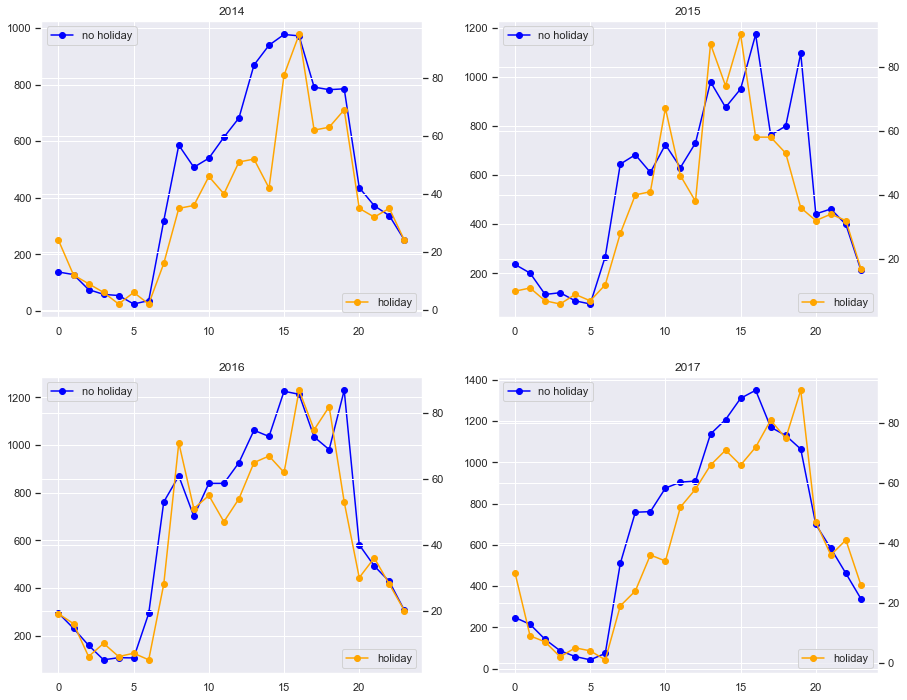

In [83]:
accHolidayHour(df)

# Analyzing the accident frequency per day during holidays & non-holidays

In [90]:
df['Day'].replace({'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}, inplace = True)
df.head()

,Accident_ID,street,Accident_SerialNo,Year,Month,Day,C,A,B,K,...,Crash,Pedes,Run_Off,DateOnly,HolidayType,TimeNew,TimeHr,lat,long,Holidays
0,935394,K.A.S,046269م,2014,1,4,0,0.0,0,0,...,1,0,NaN,2014-01-03,No holiday,19:59:59.712000,19,32.001945,35.849682,Non-Holiday
1,1061774,K.A.S,A161838,2014,1,2,0,0.0,0,0,...,1,0,NaN,2014-01-01,National holiday,23:53:00.096000,23,31.957565,35.846437,Holiday
2,1065134,K.A.S,A166712,2014,1,0,1,0.0,0,0,...,1,0,NaN,2014-01-27,No holiday,17:14:00.384000,17,31.994699,35.855531,Non-Holiday
3,907647,K.A.S,A17307,2014,1,2,0,0.0,0,0,...,1,0,NaN,2014-01-01,National holiday,15:20:00.096000,15,31.955189,35.833736,Holiday
4,907697,K.A.S,A17363,2014,1,5,0,0.0,0,0,...,1,0,NaN,2014-01-18,No holiday,18:15:59.904000,18,31.962443,35.856456,Non-Holiday


In [93]:
def accHolidayWeekDay(dataframe):
    years = dataframe['Year'].unique()
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    for year, ax in zip(years, axes.flatten()):
    
        dataframe_year = dataframe[dataframe['Year'] == year]
        acc =  dataframe_year[dataframe_year['Holidays'] == 'Non-Holiday']['Day'].value_counts().sort_index()
        acc2 =  dataframe_year[dataframe_year['Holidays'] == 'Holiday']['Day'].value_counts().sort_index()
        
        l1 = ax.plot(acc.index, acc.values, label = 'no holiday', marker = 'o', color = 'blue')

        ax2 = ax.twinx()
        l2 = ax2.plot(acc.index, acc2.values, label = 'holiday', marker = 'o', color = 'orange')
        
        
    
        ax.legend(loc = 'upper left')
        ax2.legend(loc = 'lower right')
        ax.set_title(year)

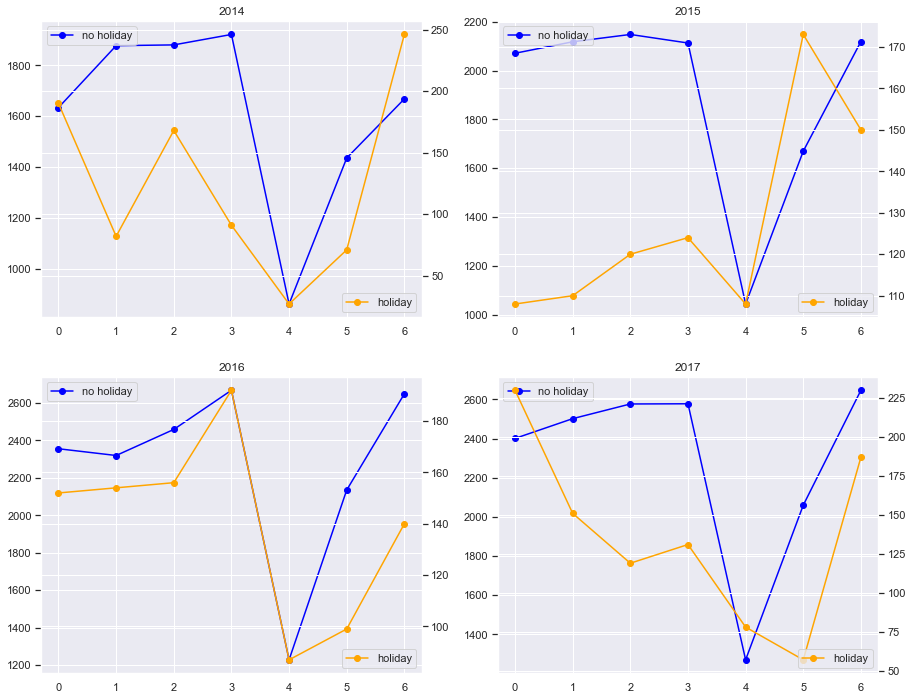

In [94]:
accHolidayWeekDay(df)

# Performing the Kruskal-Wallis (H-test)

Null Hypothesis (Ho) : Median number of accidents are equal for both non-holidays & all holiday types

ALternate Hypothesis (Ha) : Median number of accidents vary across non-holidays & holiday type

Assume level of significane(Alpha) = 0.05

In [12]:
df['HolidayType'].value_counts()

No holiday          61322
National holiday     1979
Observance           1004
Season                648
Optional Holiday      582
Name: HolidayType, dtype: int64

In [18]:
no = [df['HolidayType'].value_counts()[0]]
nat = [df['HolidayType'].value_counts()[1]]
obs = [df['HolidayType'].value_counts()[2]]
season = [df['HolidayType'].value_counts()[3]]
opt = [df['HolidayType'].value_counts()[4]]

In [19]:
kruskal(no, nat, obs, season, opt)

KruskalResult(statistic=4.0, pvalue=0.40600584970983794)

 H = 4 & p = 0.4

As p > Alpha, we cannot reject Ho. That means median number of accidents are equal for both non-holidays & all holiday types